In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt
import matplotlib.dates as dates
import numpy as np
import seaborn as sns

In [25]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')
df['Date'] = pd.to_datetime(df['Date'])
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,2019-03-03,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,2019-01-27,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,2019-01-29,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,2019-03-02,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2019-02-09,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2019-02-22,15:33,Cash,65.82,4.761905,3.2910,4.1


## Grafik perubahan terhadap waktu

### Grafik Jumlah pelanggan terhadap waktu

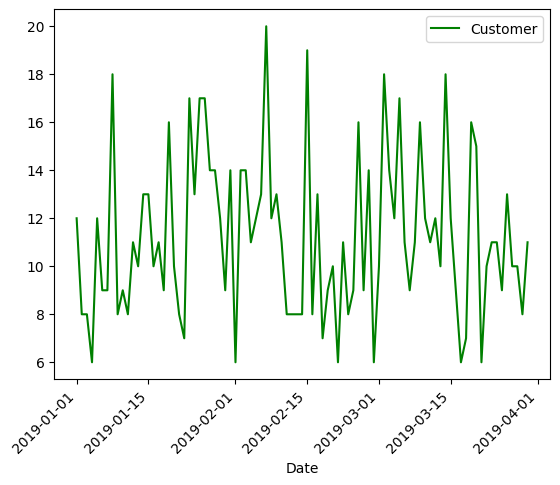

In [26]:
dfc = df.groupby(df['Date'].dt.date).size().reset_index()
dfc.rename(columns = {0 : 'Customer'}, inplace = True)
dfc.plot(x='Date', y='Customer', color = 'g')
plt.xticks(rotation=45, ha='right')
plt.show()

### Grafik pendapatan kotor terhadap waktu

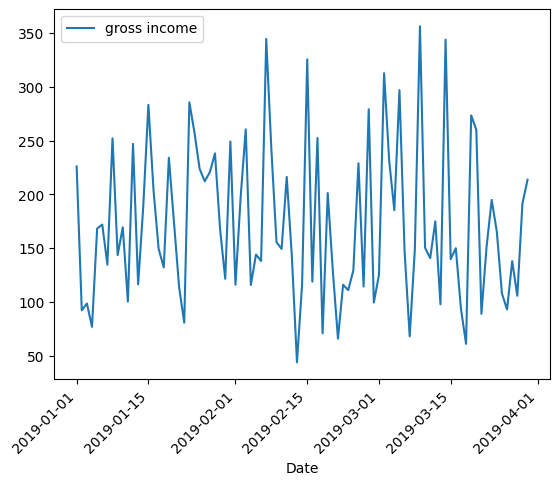

In [27]:
dfg = df.groupby(df['Date'].dt.date)['gross income'].sum().reset_index()
dfg.plot(x='Date', y='gross income')
plt.xticks(rotation=45, ha='right')
plt.show()

## Grafik perbandingan

### Grafik perbandingan total unit barang yang terjual antar jenis barang

In [28]:
dfq = df.groupby('Product line')['Quantity'].sum().reset_index()
dfq

,Product line,Quantity
0,Electronic accessories,971
1,Fashion accessories,902
2,Food and beverages,952
3,Health and beauty,854
4,Home and lifestyle,911
5,Sports and travel,920


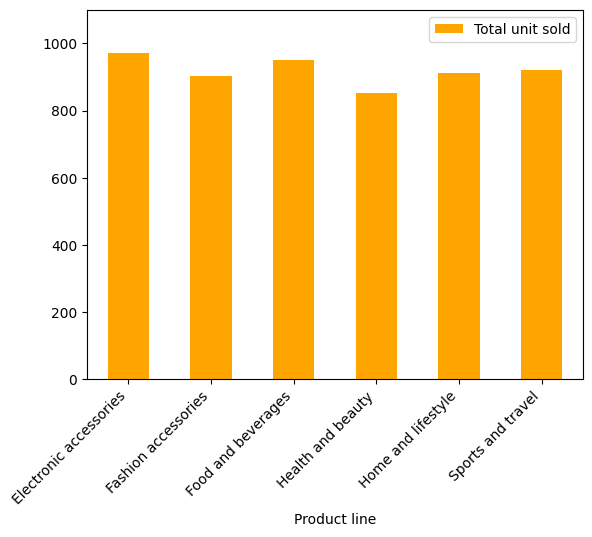

In [29]:
dfq = df.groupby('Product line')['Quantity'].sum().reset_index()
dfq.rename(columns = {'Quantity' : 'Total unit sold'}, inplace=True)
dfq.plot(kind='bar', x = 'Product line', y = 'Total unit sold', color = 'orange')
plt.xticks(rotation = 45, ha = 'right')
plt.ylim(0, 1100)
plt.show()

### Grafik perbandingan antar gender total unit barang yang terjual untuk setiap jenis produk

In [30]:
dfcp = df.groupby(['City', 'Product line']).size().unstack().reset_index()
dfcp

Product line,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,55,62,50,53,50,62
1,Naypyitaw,55,65,66,52,45,45
2,Yangon,60,51,58,47,65,59


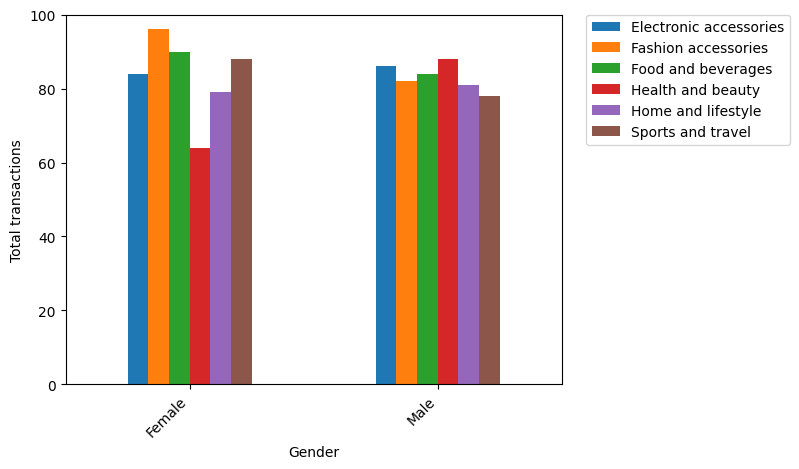

In [31]:
dfcp = df.groupby(['Gender', 'Product line']).size().unstack().reset_index()
dfcp.plot(kind='bar', x ='Gender', y=['Electronic accessories', 'Fashion accessories', 'Food and beverages', 'Health and beauty', 'Home and lifestyle', 'Sports and travel'], ylabel = 'Total transactions')
plt.xticks(rotation = 45, ha = 'right')
plt.ylim(0, 100)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.show()

## Hierarki dan hubungan keseluruhan-bagian

In [32]:
dfcp = df.groupby(['City', 'Product line']).size().unstack().reset_index()
dfcp

Product line,City,Electronic accessories,Fashion accessories,Food and beverages,Health and beauty,Home and lifestyle,Sports and travel
0,Mandalay,55,62,50,53,50,62
1,Naypyitaw,55,65,66,52,45,45
2,Yangon,60,51,58,47,65,59


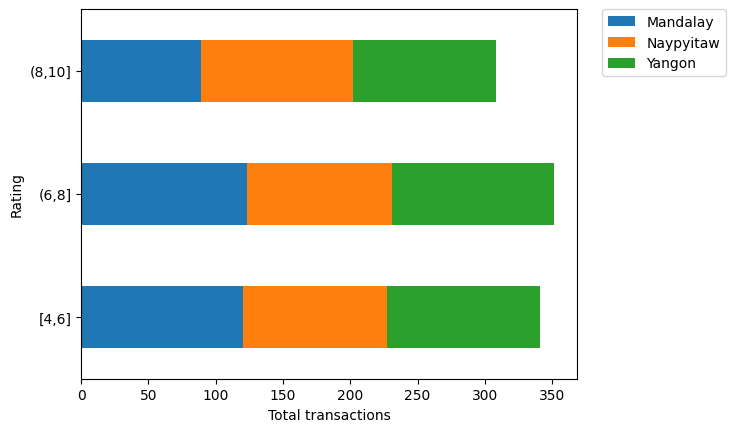

In [33]:
bins = [3.99, 6, 8, 10]
dfcr = df.groupby(pd.cut(df['Rating'], bins))['City'].value_counts().unstack()
dfcr.plot(kind='barh', stacked=True, xlabel= 'Total transactions', ylabel='Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.yticks(ticks = [0,1,2], labels = ['[4,6]', '(6,8]', '(8,10]'])
plt.show()

In [34]:
bins = [3.99, 6, 8, 10]
dfcr = df.groupby(pd.cut(df['Rating'], bins))['Gender'].value_counts().unstack()
dfcr

Gender,Female,Male
Rating,,
"(3.99, 6.0]",167,174
"(6.0, 8.0]",179,172
"(8.0, 10.0]",155,153


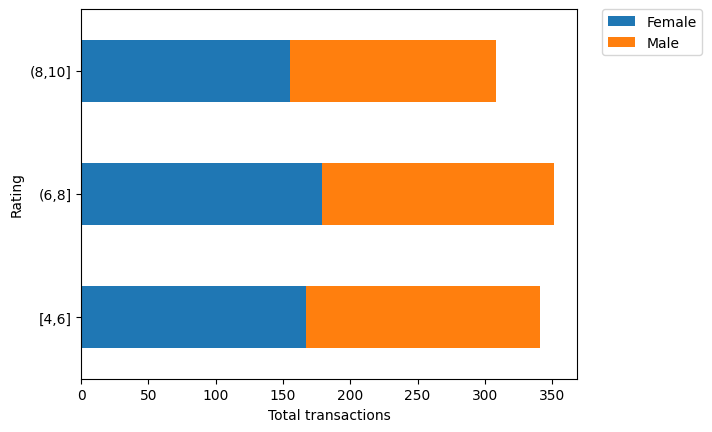

In [35]:
bins = [3.99, 6, 8, 10]
dfcr = df.groupby(pd.cut(df['Rating'], bins))['Gender'].value_counts().unstack()
dfcr.plot(kind='barh', stacked=True, xlabel= 'Total transactions', ylabel='Rating')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0)
plt.yticks(ticks = [0,1,2], labels = ['[4,6]', '(6,8]', '(8,10]'])
plt.show()

## Grafik plot relationship

### Grafik relationship antara total yang harus dibayarkan dan pendapatan kotor dari suatu transaksi

1.0

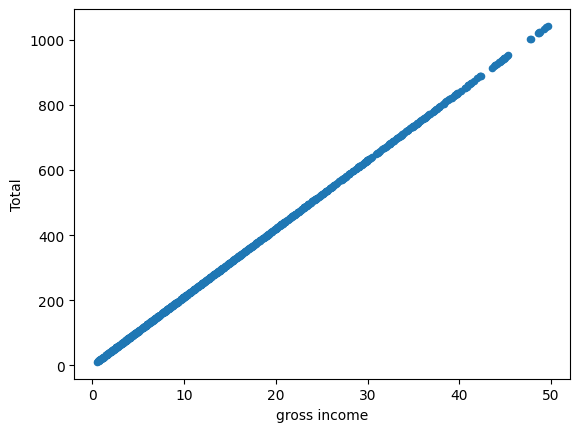

In [36]:
df.plot(kind='scatter', x = 'gross income', y ='Total')
df['gross income'].corr(df['Total'])

### Grafik relationship antara jumlah barang yang dibeli dan rating yang diberikan pada suatu transaksi

-0.01581490462716698

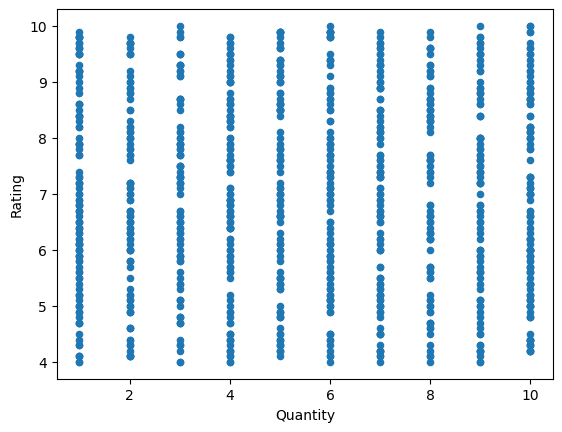

In [37]:
df.plot(kind='scatter', x ='Quantity', y='Rating')
df['Rating'].corr(df['Quantity'])